# _STAT 201 Group Project: Analysis of the effect of tree location on tree diameter_

##### _Group 31: Alexandr Kim, Yingshan Wu, Yang Lei, Harbor Zhang_

## Introduction

In our statistical investigation, we will be looking at street trees dataset provided by the City of Vancouver (See __Appendix A__). The street tree dataset lists out the information about the trees that are located within city of Vancouver with diverse classifications such as species name of the tree, common name, number of trees on street side name, and number of trees on different neighbourhood. We are going to select the `CURB` (which classifies the data into 2 category of whether or not the tree is located at the curb) and evaluating it with the `DIAMETER` (in inches). Using this data set, we are going to mainely use `infer`, `tidyverse`, and `ggplot2` packages in order to compute hypothesis testing utilising difference in medians of two type of trees that we selected under the significance level of 95% ($\alpha$ = 0.05) to answer an inferential question: "Are the diametres of trees at the curb different from those which are not located at the curb?". And later on, we are also going to contruct a 95% confidence interval to predict the true population difference in medians of tree diameters on and not on the curb.

 ## <span style="color:red"> 1. add figure label/ adjust figure title  </span> 
 ## <span style="color:red"> 2. add simple analysis on each code box's result </span> 

## Methods and Results

Loading in the necessary libraries for this data analysis

In [2]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(infer)
library(repr)
library(ggplot2)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




While loading the library and shows error that the R cannot load a package, go to __Appendix B__ and install all relevant packages for this statistical investigation.

While loading the library and shows error that the R cannot load a package, go to __Appendix B__ and install all relevant packages for this statistical investigation.

In [3]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

glimpse(street_trees_data)

Rows: 151,101
Columns: 19
$ TREE_ID            <int> 19880, 19893, 19904, 19907, 19912, 19914, 19935, 19…
$ CIVIC_NUMBER       <int> 755, 1107, 1135, 1155, 1180, 1191, 1250, 1285, 1284…
$ STD_STREET         <chr> "E 19TH AV", "E 19TH AV", "E 19TH AV", "E 19TH AV",…
$ GENUS_NAME         <chr> "FRAXINUS", "PRUNUS", "PRUNUS", "PRUNUS", "PRUNUS",…
$ SPECIES_NAME       <chr> "OXYCARPA", "SERRULATA", "SERRULATA", "SERRULATA", …
$ CULTIVAR_NAME      <chr> "", "KWANZAN", "KWANZAN", "KWANZAN", "KWANZAN", "KW…
$ COMMON_NAME        <chr> "CAUCASIAN ASH", "KWANZAN FLOWERING CHERRY", "KWANZ…
$ ASSIGNED           <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "…
$ ROOT_BARRIER       <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "…
$ PLANT_AREA         <chr> "6", "8", "8", "8", "8", "8", "8", "8", "8", "6", "…
$ ON_STREET_BLOCK    <int> 700, 1100, 1100, 1100, 1100, 1100, 1200, 1200, 1200…
$ ON_STREET          <chr> "E 19TH AV", "E 19TH AV", "E 19TH AV", "E 19TH AV",…
$ NEIGHBOURHOO

As we can see that our original data set contains lots of irrelevant data in our statistical investigation as we only need `CURB` and `DIAMETER`. Also, it will most likely not contain `NA` values in our dataset as it is a data collected by the City of Vancouver, we are going to filter out all `NA` values using the function `!is.na()`.

In [4]:
set.seed(1234)

tidy_street_trees <- 
    street_trees_data %>%
    filter(!is.na(DIAMETER)) %>%
    select(CURB, DIAMETER)
head(tidy_street_trees)

CURB,DIAMETER
<chr>,<dbl>
Y,12.0
Y,29.0
Y,27.0
Y,32.0
Y,14.5
Y,27.0


_As our data is tidied up, we are going to first visualise our data using `boxplot()` (code that creates side-by-side bar graph) in order to see whether there are any outliers that may impact our investigation._

 ## <span style="color:red"> log() boxplot comparison </span>

Warning message:
“Removed 39 rows containing non-finite values (stat_boxplot).”


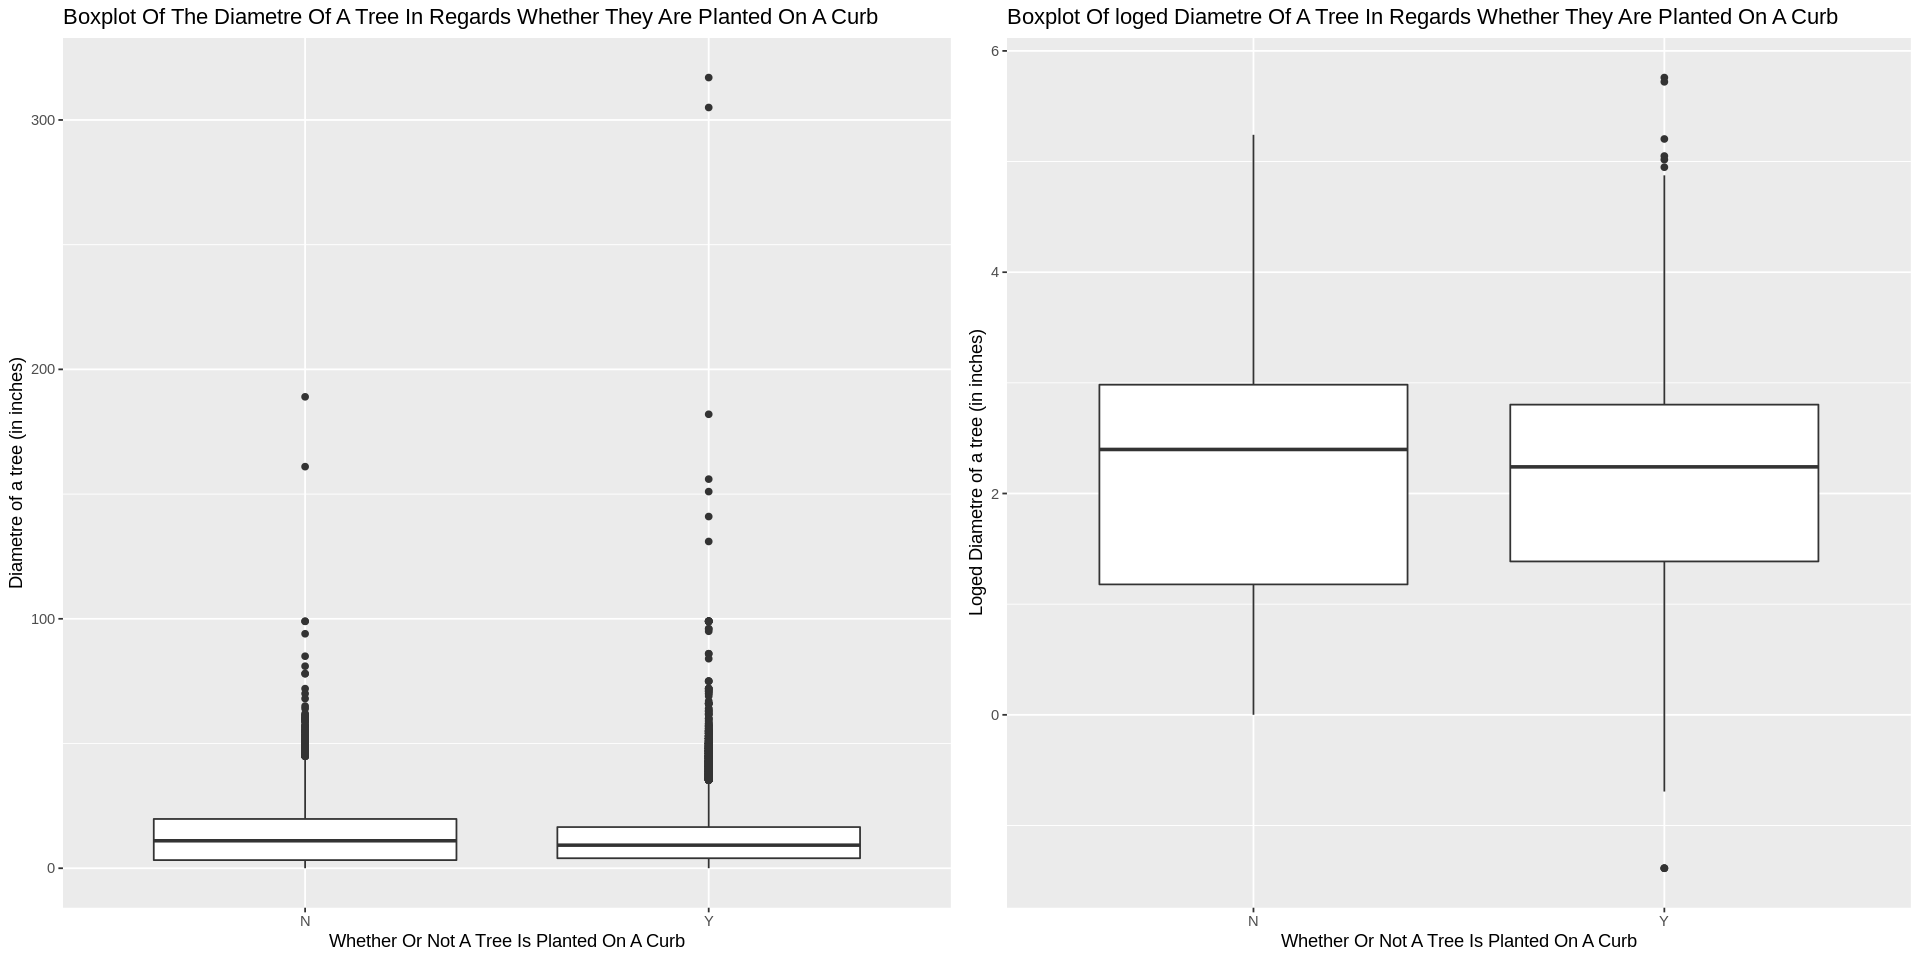

In [28]:
set.seed(1234)
options(repr.plot.width = 16, repr.plot.height = 8)

tree_curb_Y <- 
    tidy_street_trees %>%
    filter(CURB == "Y") 

tree_curb_N <- 
    tidy_street_trees %>%
    filter(CURB == "N") 

# boxplot(tidy_street_trees$DIAMETER ~ tidy_street_trees$CURB,
#         col='steelblue',
#         main='Boxplot Of The Diametre Of A Tree In Regards Whether They Are Planted On A Curb',
#         xlab='Whether Or Not A Tree Is Planted On A Curb',
#         ylab='Diametre of a tree (in inches)') 

original_dist_plot <- ggplot(tidy_street_trees) +
    geom_boxplot(aes(x = CURB, y = DIAMETER)) +
    ggtitle("Boxplot Of The Diametre Of A Tree In Regards Whether They Are Planted On A Curb") +
    xlab("Whether Or Not A Tree Is Planted On A Curb") +
    ylab("Diametre of a tree (in inches)")

log_dist_plot <- ggplot(tidy_street_trees) +
    geom_boxplot(aes(x = CURB, y = log(DIAMETER))) +
    ggtitle("Boxplot Of loged Diametre Of A Tree In Regards Whether They Are Planted On A Curb") +
    xlab("Whether Or Not A Tree Is Planted On A Curb") +
    ylab("Loged Diametre of a tree (in inches)")

plot_grid(original_dist_plot, log_dist_plot, ncol = 2)

Through the boxplot above, we can tell there are some observations classified as outliers (Separated dots in both boxplots indicate the outliers). This means that using median as our measure of centre is better option than the mean as the median "is not affected by the precise numerical values of the outliers" (Illowsky & Dean, n.d.). Therefore, in our investigation, we will be utilising median as our measure of centre. As we now know that there are lots of outliers at the upper tail region, we will create histograms in order to see the trend of the distribution effectively and more visually.

 ## <span style="color:red"> !! add a vertical line at mean</span>

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


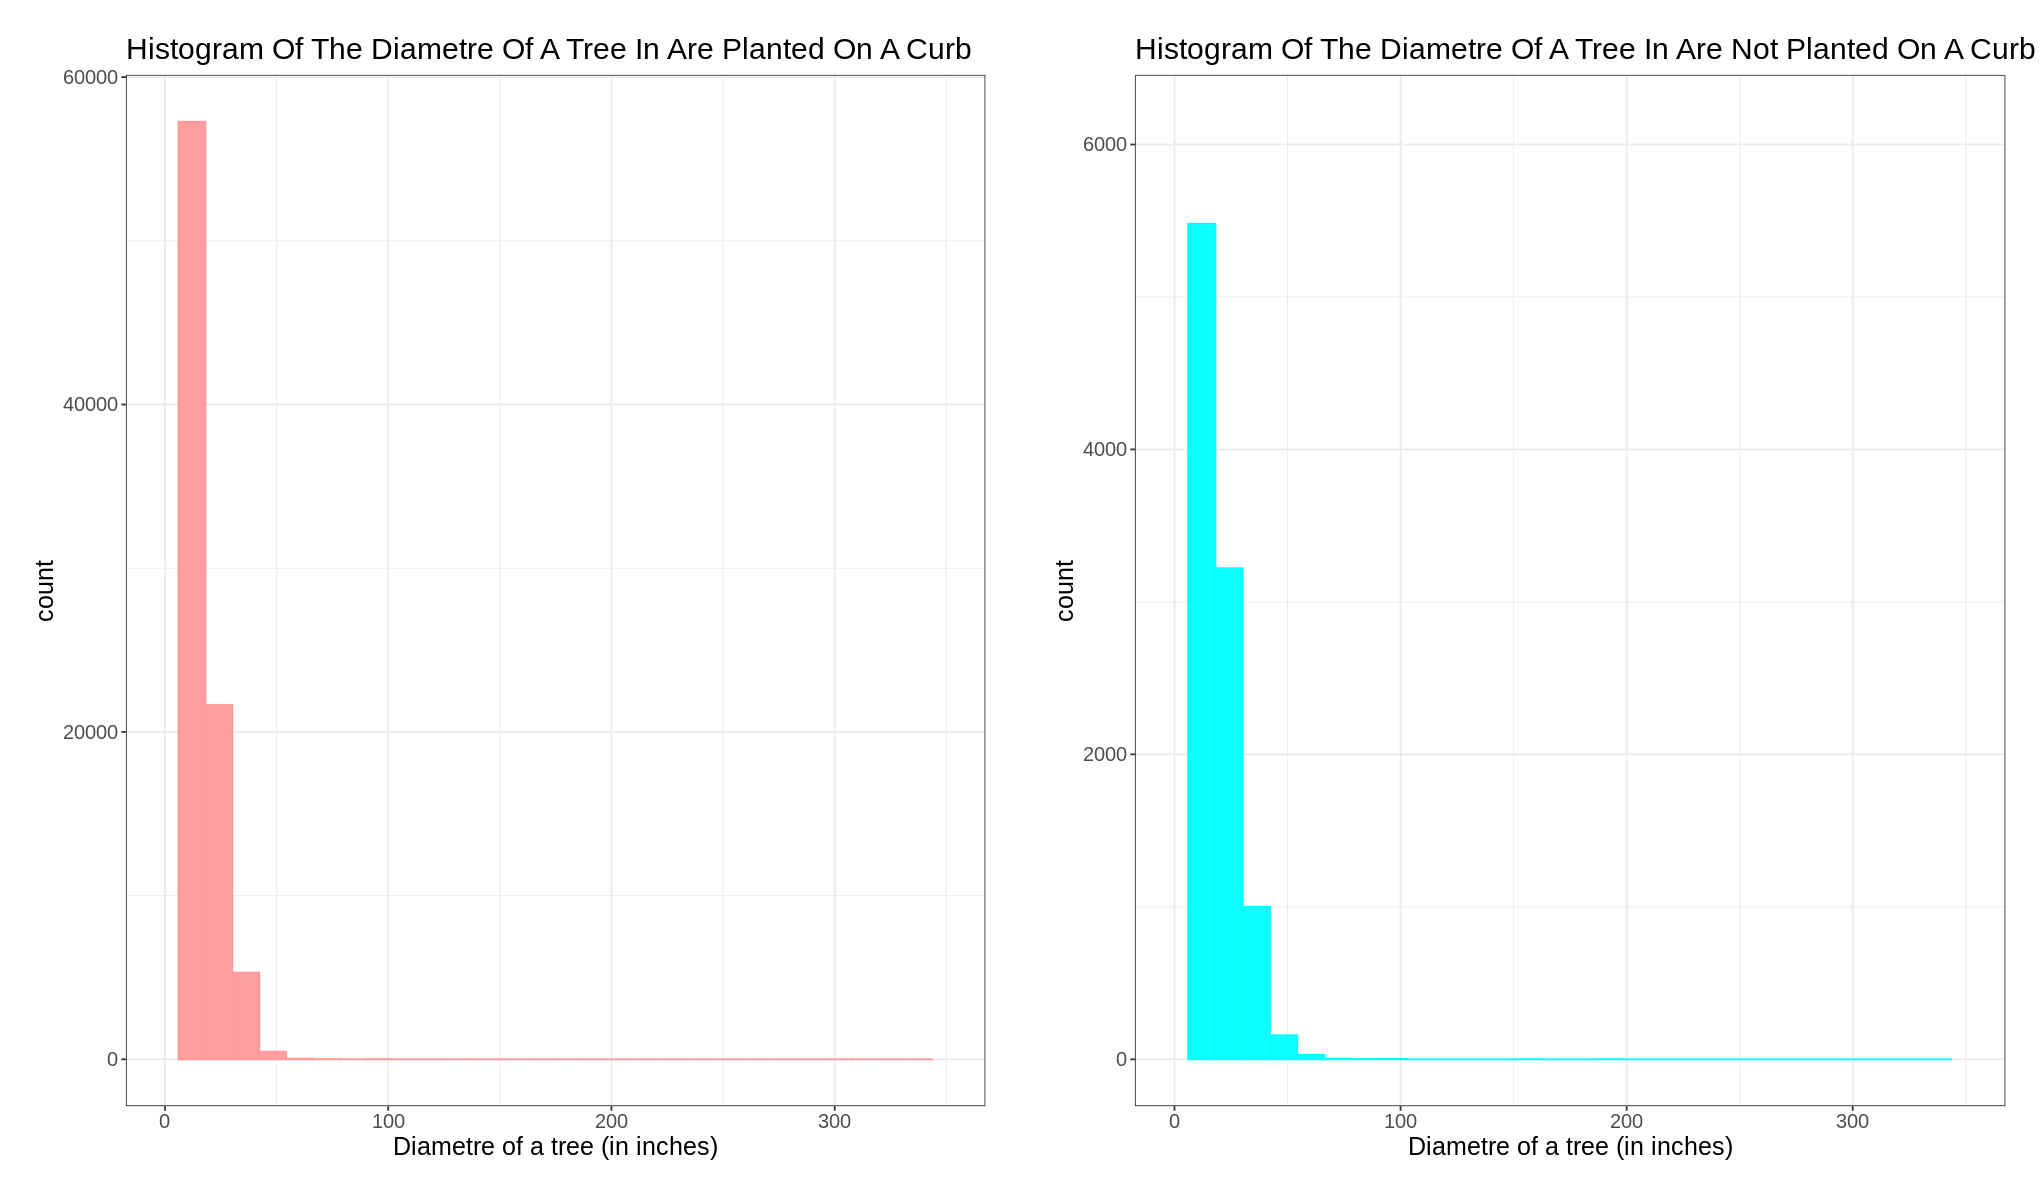

In [8]:
set.seed(1234)
options(repr.plot.width = 17, repr.plot.height = 10)

tree_curb_Y_histo <- 
    tree_curb_Y %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#FF9999", fill = "#FF9999", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             title = 'Histogram Of The Diametre Of A Tree In Are Planted On A Curb') +
        scale_x_continuous(limits = c(0, 350)) +
        theme_bw() +
        theme(text = element_text(size = 15))

tree_curb_N_histo <- 
    tree_curb_N %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#00FFFF", fill = "#00FFFF", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             title = 'Histogram Of The Diametre Of A Tree In Are Not Planted On A Curb') +
        scale_x_continuous(limits = c(0, 350)) +
        theme_bw() +
        theme(text = element_text(size = 15))

tree_curb_histo <- plot_grid(tree_curb_Y_histo, tree_curb_N_histo, scale = 0.95)
tree_curb_histo

In [ ]:
##change to mean

set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 5)

bootstrap_distribution_Y <- tree_curb_Y %>% 
  specify(response = DIAMETER) %>% 
  generate(reps = 200) %>% 
  calculate(stat = "mean") %>%
  visualise()

bootstrap_distribution_N <- tree_curb_N %>% 
  specify(response = DIAMETER) %>% 
  generate(reps = 200) %>% 
  calculate(stat = "mean") %>%
  visualise()

tree_curb_bootstrap_dist <- plot_grid(bootstrap_distribution_Y, bootstrap_distribution_N)
tree_curb_bootstrap_dist

Setting `type = "bootstrap"` in `generate()`.



As we can see from histograms above that we visualised a bootstrap distribution of sample medians (`stat` in our x-axis labelling represents the median values) of each categories (`CRUB == "Y"` and `CRUB == "N"`), the graph became more normal shape than it's original observation data. The histograms above follow to some extent normal shape than the histogram from original street tree sample, it does not exactly demonstrates an ideal normal distribution graph as due to small number of repitition. This limitation occurred due to limitation of our kurnel that only allows up to approximately 200 `reps`.

### Contructing Hypothesis test

First, our population parameter of interest is the difference in population means of tree diameters $d_{y}$ - $d_{n}$, where $d_{y}$ is the mean of diameters of trees on the curb, and $d_{n}$ is of trees not on the curb. Then, we set the null hypothesis $H_{0}$ to be that there is no difference in means of diameters of trees on and not on the curb. And the alternative hypothesis $H_{A}$ to be that there is a difference. 

$H_{0} : d_{y} - d_{n} = 0 $

$H_{A} : d_{y} - d_{n} \neq 0 $

_We first count the numbers of trees planted on and not on the curb respectively in `tidy_street_trees` to get a picture of our data._

In [ ]:
set.seed(1234)

tree_count <-
    tidy_street_trees %>% 
    count(CURB)

tree_count

_Then, calculate the observed test statistic (median of trees on the curb minus median of trees not on the curb)  using `tidy_street_trees` with the `infer` package._

In [ ]:
set.seed(1234)

obs_diff_in_means <- tidy_street_trees %>%
    specify(formula = DIAMETER ~ CURB) %>%
    calculate(stat = "diff in means", order = c("Y", "N"))

obs_diff_in_means

_Next, generate the null distribution with 100 samples and calculate mean of trees on the curb minus mean of trees not on the curb, using `tidy_street_trees` with the `infer` package._

In [ ]:
set.seed(1234)

null_diff_in_means <- 
    tidy_street_trees %>%
    specify(formula = DIAMETER ~ CURB) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 100, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Y", "N"))

head(null_diff_in_means)

_Visualize the result of the hypothesis test with a vertical bar for the observed test statistic, and shade the tails._

In [ ]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 5.5)

diff_in_means_plot <-
        visualize(null_diff_in_means, bins = 30) +
        shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
        xlab("Difference in Means") +
        theme(text = element_text(size = 18))

diff_in_means_plot

_We then are able to obtain the p-value of the observed test statistic (`obs_diff_in_means`) from the null distribution of means (`null_diff_in_means`)._

In [ ]:
set.seed(1234)

p_val_diff_means <- 
    null_diff_in_means %>% 
    get_p_value(obs_stat = obs_diff_in_means, direction = "both")

p_val_diff_means

Given that we now obtain a p-value of 0 just through computing p-value analysis using r. However, as we are using 100 repetitions to calculate the sample, we are going to report that p-value is < 0.01. P-value being less than 0.01 is smaller than our pre-specified significance level of $\alpha = 0.05$, we now can conclude that we reject $H_{0}$ at the 5% significance level. In other words, we reject the $H_{0}$, which there is no difference between medians of tree diameters on and not on the curb, at a significance level of $\alpha = 0.05$.

 ## <span style="color:red"> !! add t-test analysis</span>

 ## <span style="color:red"> !! add p-value comparison analysis</span>

### Computing Confidence Interval

Next, we are going to contruct a 95% confidence Interval to try to capture the true population difference in mean of diameters of trees on and not on the curb. First, find the bootstrap distribution for the difference in means with the `infer` package.

In [ ]:
set.seed(1234)

diff_in_means_bootstrap_dist <-
    tidy_street_trees %>% 
    specify(formula = DIAMETER ~ CURB) %>%
    generate(reps = 100, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Y", "N"))

head(diff_in_means_bootstrap_dist)

_Then, obtain the 95% confidence interval for the difference in mean._

In [ ]:
set.seed(1234)

diff_in_means_ci <-
    diff_in_means_bootstrap_dist %>%
    summarise(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975))

diff_in_means_ci

_Visualize the confidence interval (`diff_in_means_ci`) with the bootstrap distribution (`diff_in_means_bootstrap_dist`)._

In [ ]:
set.seed(1234)

diff_in_means_ci_plot <-
        visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) +
    xlab("Difference in Means") +
    theme(text = element_text(size = 18))

diff_in_means_ci_plot

## Methods

We first decide our null hypothesis and alternative hypothesis. The null hypothesis is that the median diameter of the trees that are located at the curb is the same as the median diameter of the trees which are not at the curb. The alternative hypothesis is that the median diameter of the trees that are located at the curb is different from the median diameter of the trees which are not at the curb. Then we use the infer package to calculate the observed test statistic (observed difference in medians). After that, we generate 1000 samples from the null distribution and calculate the difference in medians for each sample. Then, we visualise the null distribution and the observed test statistic in one plot, and we shade the two-sided p-value. Followingly, we compare the p-value with the 5% significance level and make our conclusion whether to reject the null hypothesis. The next step is that we are going to find a 95% confidence interval for the difference in median. We will generate 1000 bootstrapping samples and calculate the difference in medians for each sample. Then we get our confidence interval and visualise it with the bootstrap distribution.

### Expected Outcomes and Significance

We assume that the median diameter of the trees planted on the curb would be different from the median diameter of the trees planted not on the curb. The results we find will help conclude whether there is any statistically significant difference between tree diameters on and not on the curb. In reality, city planning might have different needs and standards on trees’ thickness on and not on the curb. This finding could provide evidence on whether existing trees on and not on the curb have differences in thickness, and it could present as data assisting future analysis. For future tree planting in Vancouver, we can use the results we find from this analysis to do effective city planning as the City of Vancouver can better arrange trees with different diameters to look more standardised and visually appealing.

## Discussion

## References and Appendix

_All in-text citation and references are written in  APA 7 (American Psychological Association 7th edition) style_

Illowsky, B., & Dean, S. (n.d.). 2.6: Measures of the Center of the Data. In _Introductory Statistics_. De Anza College: LibreTexts. Retrieved July 22, 2022, from https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/02%3A_Descriptive_Statistics/2.06%3A_Measures_of_the_Center_of_the_Data